### Optimasi Fungsi

1. Newton Raphson

Carilah nilai akar dari fungsi berikut

\begin{equation}
\ f(x) = x^2 - 4x + 4
\end{equation}

In [74]:
def fung(x):
    return x**2 - 6*x +9

def dfung(x,h):
    return 2*x -4

def NewthonRaph(x0, h):
    for i in range(1000):
        x_next = x0 - fung(x0)/dfung(x0,h)
        if(abs(x_next - x0) < 0.01):
            break
        x0 = x_next
    return x0

NewthonRaph(1,0.01)

3.0

In [75]:
def fung(x):
    return x**2 - 6*x +9

def dfung(x,h):
    df = (fung(x+h) - fung(x))/h
    return df

def NewthonRaph(x0, h):
    for i in range(1000):
        x_next = x0 - fung(x0)/dfung(x0,h)
        if(abs(x_next - x0) < 0.01):
            break
        x0 = x_next
    return x0

NewthonRaph(1,0.01)

3.000086096810316

## 2. Optimasi fungsi linear

In [76]:
X = 2 * np.random.rand(100,1)
y = 4 +3 * X+np.random.randn(100,1)

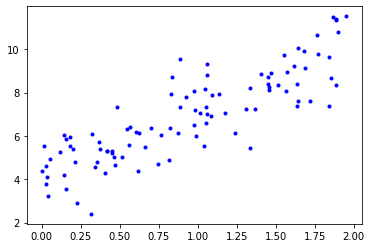

In [77]:
plt.plot(X,y,'b.')
plt.show()

##### Secara Analitik

In [93]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

array([[1.        , 0.88532276],
       [1.        , 0.44911147],
       [1.        , 0.83130991],
       [1.        , 0.14163167],
       [1.        , 0.11465662],
       [1.        , 0.01654539],
       [1.        , 1.05399782],
       [1.        , 1.64279929],
       [1.        , 1.08787749],
       [1.        , 1.47185371],
       [1.        , 0.82244215],
       [1.        , 0.97719348],
       [1.        , 0.36647392],
       [1.        , 1.55129053],
       [1.        , 1.44989905],
       [1.        , 0.76276209],
       [1.        , 1.1730501 ],
       [1.        , 0.66174328],
       [1.        , 1.23880256],
       [1.        , 0.35419586],
       [1.        , 1.86753859],
       [1.        , 0.4661853 ],
       [1.        , 1.51161626],
       [1.        , 1.08931065],
       [1.        , 0.21321952],
       [1.        , 0.03498536],
       [1.        , 1.64316092],
       [1.        , 0.34480748],
       [1.        , 1.45481105],
       [1.        , 0.14348175],
       [1.

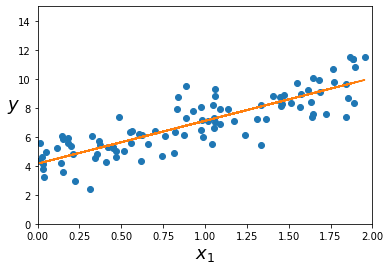

In [79]:
plt.plot(X, y, 'o')
plt.plot(X, (theta_best[0] + theta_best[1]*X))
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])
plt.show()

In [91]:
def  cal_cost(theta,X,y):
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

In [81]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history

In [92]:
lr =0.01
n_iter = 1000

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          3.949,
Theta1:          3.135
Final cost/MSE:  74.228


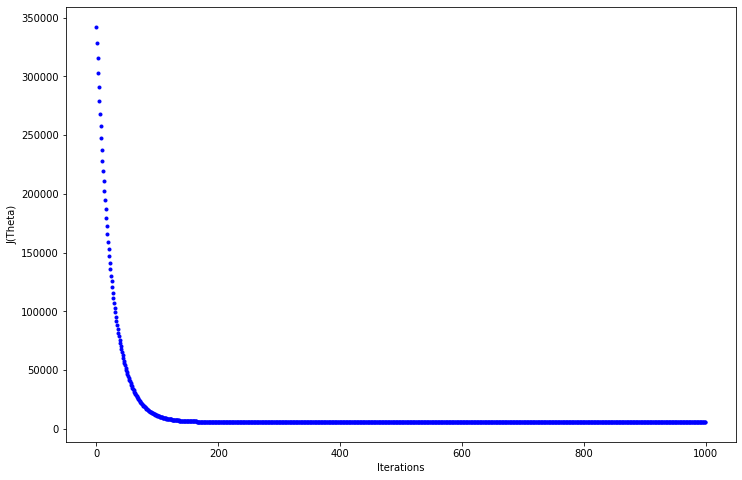

In [83]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

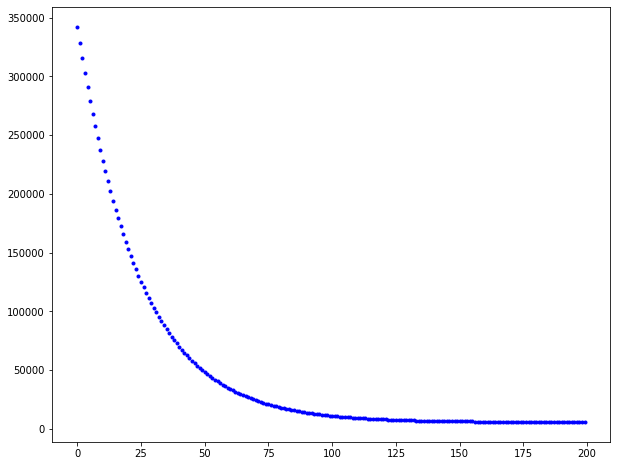

In [84]:

fig,ax = plt.subplots(figsize=(10,8))
_=ax.plot(range(200),cost_history[:200],'b.')